In Physics, modeling large sets of data is a key concept. A perfect example of random modeling is a galaxy with a few thousand stars. The code below shows a model 3D galaxy in one view and then rotated for a different view. 

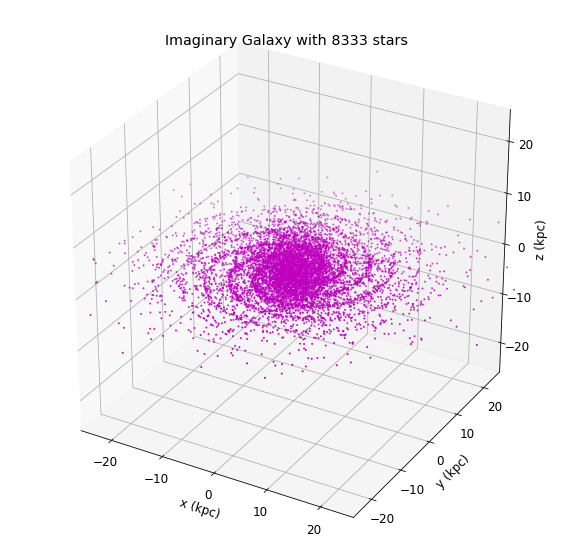

Rotation by pi/4 about y axis:
 [[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]


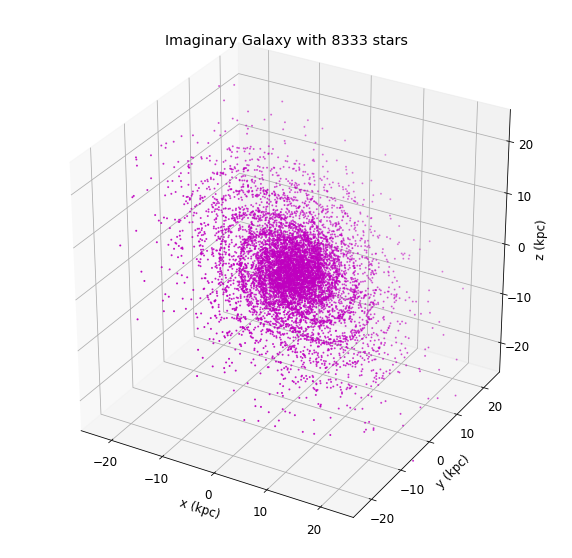

In [3]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin,cos,pi,cross

# Read the data from file:
data = np.loadtxt('galaxy2.txt', float,skiprows=1)
x = data[:,0]
y = data[:,1]
z = data[:,2]  # slice into three 1D arrays

# Make the scatter plot:
plt.figure(figsize=(10,10))
plt.rc('font', size=12)
ax = plt.gca(projection='3d')         # get some 3D axes
ax.scatter(x,y,z,s=1,c='m')           # do the scatter plot
psize = 25.0                          # size of plotting box
ax.set_xlim(-psize, psize)
ax.set_ylim(-psize, psize)
ax.set_zlim(-psize, psize)
ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
ax.set_zlabel('z (kpc)')
plt.title ('Imaginary Galaxy with %d stars'%len(x))
plt.show()

def rmat(theta,nhat):
    """Returns 3D rotation matrix thru theta(rad) about unit vector nhat"""
    return linalg.expm(cross(np.eye(3),nhat*theta))

yhat=np.array([0,1,0])
print('Rotation by pi/4 about y axis:\n',rmat(pi/4,yhat))

rmat45 = rmat(pi/4,yhat)  # matrix for rotation by pi/4

x = data[:,0]
y = data[:,1] 
z = data[:,2]


xyz = np.stack((x,y,z), axis = 1) # xy is a 10 by 2 array of the unrotated points
xyzr = xyz@(rmat45.T)           # xyr is a 10 by 2 array of the rotated points
xr = xyzr[:,0]
yr = xyzr[:,1] 
zr = xyzr[:,2]           # slice out the two columns

plt.figure(figsize=(10,10))
plt.rc('font', size=12)
ax = plt.gca(projection='3d')         # get some 3D axes
ax.scatter(xr,yr,zr,s=1,c='m')           # do the scatter plot
psize = 25.0                          # size of plotting box
ax.set_xlim(-psize, psize)
ax.set_ylim(-psize, psize)
ax.set_zlim(-psize, psize)
ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
ax.set_zlabel('z (kpc)')
plt.title ('Imaginary Galaxy with %d stars'%len(x))
plt.show()

This is a sample code involving electronics. VV(f) is the function where frequency is inputted and an array of Va and Vb is outputted. this is done by finding a system of linear equations to solve for Va and Vb and using linalg to solve them. I is the array which stores the coefficients for Va and Vb in the linear equations, the first element are the coefficients in first equation and so on. D is the array that stores the values of what the equations equal which needs to be present for linalg to execute properly

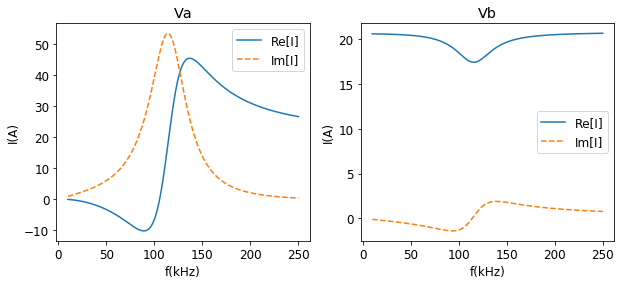

In [4]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy import sin,cos,pi,exp

R1 = 330
R2 = 10
R3 = 22

L = 1.5*10**-4
C = 1.2*10**-8
V = 30
pts = 241
freq=np.linspace(10,250,241) #array of frequencies to plot later.

def VV(f): # here is the part where user inputs frequency and gets Va, Vb values (question 4)
    A = 2j*pi*f*L*1000
    B = (2j*pi*f*C*1000)
    I = np.array([[(1/A) + B + 1/330, -B],[-B, 1/22 + 1/10 + (B)]])
    D = np.array([30/330,3])
    VV = linalg.solve(I,D)
    return VV
          

vva = np.zeros(pts,complex) #arrays to hold Va and Vb values
vvb = np.zeros(pts,complex)
for i in range(pts): #assigning values to the empty arrays abover
    vva[i],vvb[i] = VV(freq[i]) #adding frequencies to array

plt.figure(figsize=(10,4))

plt.subplot(1,2,1) #plotting Va
plt.plot(freq,vva.real, label = "Re[I]") #regular voltage
plt.plot(freq,vva.imag,'--', label = "Im[I]") #complex voltage
plt.xlabel('f(kHz)')
plt.ylabel('I(A)')
plt.title("Va")
plt.legend(fontsize = 12)

plt.subplot(1,2,2)
plt.plot(freq,vvb.real, label = "Re[I]") # regular voltage
plt.plot(freq,vvb.imag, '--', label = "Im[I]") #complex voltage
plt.xlabel('f(kHz)')
plt.ylabel('I(A)')
plt.title("Vb")
plt.legend(fontsize = 12)


An important theme throughout my physics education was dealing with waves and oscillations. As I progressed though my electronics courses filtering data became more important. To showcase sound filtering, I took a recording of a piano and a flute and filtered the sound through a Hanning Window and then preformed a Discete Cosine Transformation in order to view the coefficients of the mathematecal expression of the oscillation in order to better understand the data.

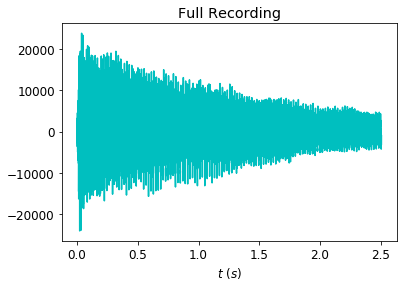

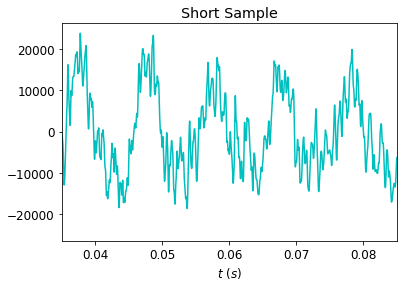

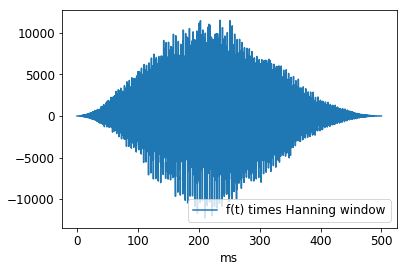

Text(0.5, 0, 'Hz')

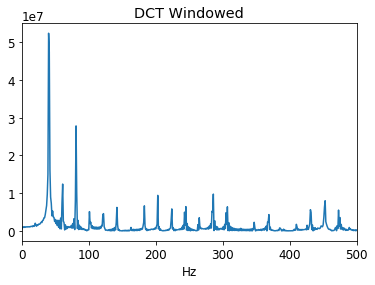

In [6]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from numpy import array,hanning
from scipy.fftpack import dct,idct
from scipy import randn
from scipy.io import wavfile
import sys

rate,rawdata = wavfile.read('piano.wav')
data = rawdata[:,1]
pts = data.size
tmax = pts/rate




t = np.linspace(0,tmax,pts)
#plotting all the data
plt.plot(t,data,'c')
plt.xlabel(r'$t$ ($s$)')
plt.title('Full Recording')
plt.show()

#SHORT SAMPLE 

    #50ms to get 5 repetitions 
tmin = 35e-3
tmax = 85e-3 


plt.figure()
plt.plot(t,data,'c')
plt.xlim([tmin,tmax]) # set the range
plt.xlabel(r'$t$ ($s$)')
plt.title('Short Sample')
plt.show()

#LONG SAMPLE DCT


tau = .5                        # sampling time (s), here 1 microsec
t = np.linspace(0,tau,pts)  # array of sample times (s)
f = data                    # array of sampled function points
f2 = hanning(pts)*f                # apply Hanning window
plt.figure()
#plt.plot(t/1000,f,label='f(t)')
plt.plot(t*1000,f2,label='f(t) times Hanning window')
#plt.plot(t*1000,abs(dct(f2)),label='dct Hanning window')
plt.legend()
plt.xlabel('ms')
plt.show()



#DCT Windowed
a = abs(dct(data[11000:20000])) 
#when these points are specified allows the peaks to be seen smoothly"

plt.xlim(0,500)
plt.plot(a)
plt.title('DCT Windowed')
plt.xlabel('Hz')

Similar to code 3. This code shows a discrete cosine transformation for a sample oscillilation. 

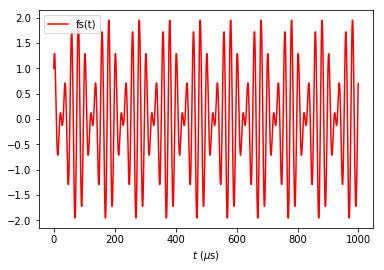

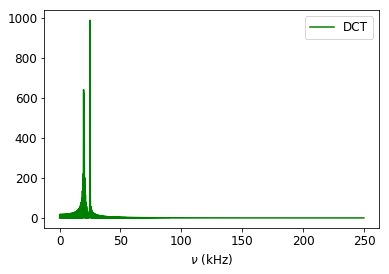

In [2]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,cos,exp,real,imag,sin
from scipy.fftpack import dct

def ffunc(t):
   return sin(2*pi*v1*t)+cos(2*pi*v2*t)

v1 = 20e3       # kHz
v2 = 25e3   # kHz

# Get data to be transformed by sampling function above, and plot
N = 1000                          # number of points
ts = 2e-6                        # sampling time (s), here 1 microsec
t = np.linspace(0,(N-1)*ts,N)  # array of sample times (s)
f = ffunc(t)                      # array of sampled function points
plt.figure()
plt.plot(t/ts,f,'r',label='fs(t)')
plt.legend()
plt.xlabel(r'$t$ ($\mu$s)')
plt.show()

# Compute and plot discrete FT of the data
a = dct(f)               # do the disctete cosine transforms
nun = 1/(2*ts)            # Nyquist frequency (Hz)
numax = ((N-1)/N)*nun   # max frequency in the DCT (Hz)..

# Compute the discrete FT of the data, and plot:
nu = np.linspace(0,numax,N)      # array of frequencies (Hz)
plt.figure()
plt.rc('font',size=12)
plt.plot(nu/1e3,abs(a),'g',label='DCT')
plt.legend()
plt.xlabel(r'$\nu$ (kHz)')
plt.show()

Is a code showing how to filter noise. The first part is the data set with standard deviation of .7. to graph this data set i added 0.7*randn(N) to the given function to create a set of N data points. and then for the second part I took the discrete cosine transform, given by importing the function dct the numerical methods handout. To do this an array of frequencies had to be made. The next part was to filter the data. This is done in a for loop where the value we want to filter starts at 100 khz. a vmax was created at that value and then it filtered the excess noise after that by adding the values before the given vmax to an array and then plotting that area of data. Lastly, to get back to the original graph you take the inverse dct which is dont the same syntaxtical way as taking the dct. since it is filtered, the graph looks much cleaner and clearer even though it has the same number of points.


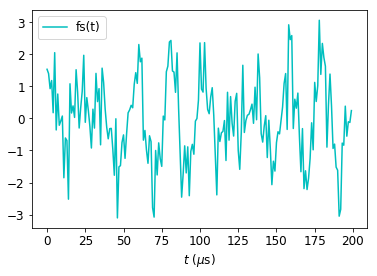

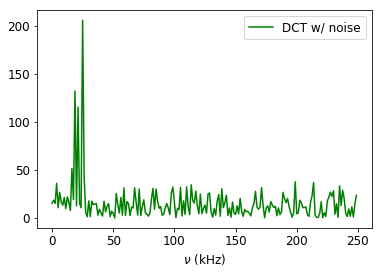

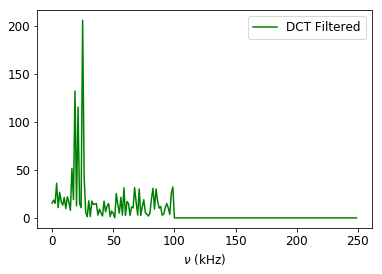

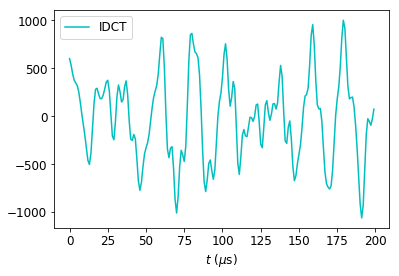

In [3]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,cos,exp,real,imag,sin
from scipy.fftpack import dct,idct
from scipy import randn

def ffunc(t):
   return sin(2*pi*v1*t)+cos(2*pi*v2*t)
v1 = 20e3       # kHz
v2 = 25e3   # kHz

# Get data to be transformed by sampling function above, and plot
N = 200                          # number of points
ts = 2e-6                        # sampling time (s)
t = np.linspace(0,(N-1)*ts,N)  # array of sample times (s)
f = ffunc(t)
f2 = f+0.7*randn(N)                      # array of sampled function points
plt.figure()
plt.plot(t/ts,f2,'c',label='fs(t)')
plt.legend()
plt.xlabel(r'$t$ ($\mu$s)')
plt.show()

# Compute and plot discrete FT of the data
a = dct(f2)               # do the disctete cosine transforms
nun = 1/(2*ts)            # Nyquist frequency (Hz)
numax = ((N-1)/N)*nun   # max frequency in the DCT (Hz)..
nulim = 100e3
nu = np.linspace(0,numax,N)      # array of frequencies (Hz)

plt.figure()
plt.rc('font',size=12)
plt.plot(nu/1e3,abs(a),'g',label='DCT w/ noise')
plt.legend()
plt.xlabel(r'$\nu$ (kHz)')
plt.show()

af = np.zeros(N)
for i in range(N):
    if nu[i]<nulim:
        af[i] = a[i]

# Compute the discrete FT of the data, and plot:

plt.figure()
plt.rc('font',size=12)
plt.plot(nu/1e3,abs(af),'g',label='DCT Filtered')
plt.legend()
plt.xlabel(r'$\nu$ (kHz)')
plt.show()

#IDCT

f2f = idct(af)
plt.figure()
plt.plot(t/ts,f2f,'c',label='IDCT')
plt.legend()
plt.xlabel(r'$t$ ($\mu$s)')
plt.show()

THis code shows a Lorentzian Butterfly. At first I thought this code would never be useful however, as I dove deeper into electronics and circuits path of my curriculum, I found that this can potentially be the output for a Chaotic Circuit mainly the Chua Diode. The math behind this code actually helped me gain insight on how a Chua diode functions and made me happy to see how well my physics courses built upon each other. 

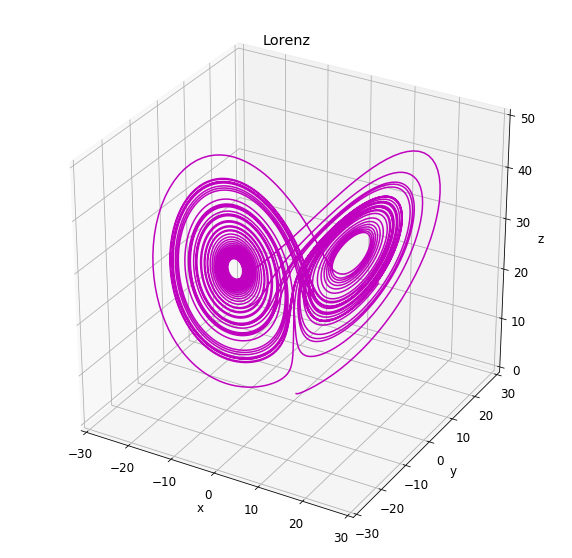

Rotation by pi/4 about y axis:
 [[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]


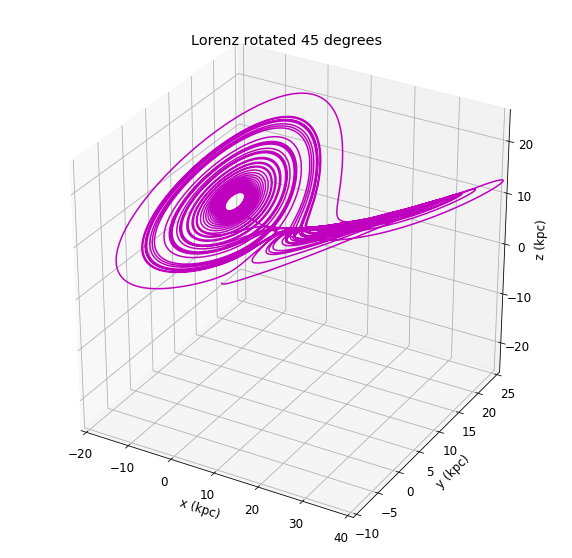

In [4]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, pi, cross
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg
from scipy.integrate import odeint    


sigma = 10
r = 28
b = 8/3



def fd(yvec,t):
    """ Computes dxdt,dy/dt."""
    x,y,z = yvec   # unpack vector into the three dependent variables
    dxdt = sigma*(y-x)
    dydt = r*x-y-x*z
    dzdt = x*y-b*z
    return dxdt,dydt,dzdt 

t = np.linspace(0,50,10000) 
x0 = 0
y0 = 1
z0 = 0                      # inital condition

xy = odeint(fd,(x0,y0,z0),t) 

xvals = xy[:,0]
yvals = xy[:,1]
zvals = xy[:,2]


plt.figure(figsize=(10,10))
plt.rc('font', size=12)
ax = plt.gca(projection='3d')         # get some 3D axes
ax.plot(xvals,yvals,zvals,c='m')           # do the scatter plot
psize = 30                          # size of plotting box
ax.set_xlim(-psize, psize)
ax.set_ylim(-psize, psize)
ax.set_zlim(0, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title ('Lorenz')
plt.show()



def rmat(theta,nhat):
    """Returns 3D rotation matrix thru theta(rad) about unit vector nhat"""
    return linalg.expm(cross(np.eye(3),nhat*theta))

yhat=np.array([0,1,0])
print('Rotation by pi/4 about y axis:\n',rmat(pi/4,yhat))

rmat45 = rmat(pi/4,yhat)  # matrix for rotation by pi/4

x = xy[:,0]
y = xy[:,1] 
z = xy[:,2]


xyz = np.stack((x,y,z), axis = 1) # xy is a 10 by 2 array of the unrotated points
xyzr = xyz@(rmat45.T)           # xyr is a 10 by 2 array of the rotated points
xr = xyzr[:,0]
yr = xyzr[:,1] 
zr = xyzr[:,2]           # slice out the two columns

plt.figure(figsize=(10,10))
plt.rc('font', size=12)
ax = plt.gca(projection='3d')         # get some 3D axes
ax.plot(xr,yr,zr,c='m')           # do the scatter plot
psize = 25                         # size of plotting box
ax.set_xlim(-20, 40)
ax.set_ylim(-10, psize)
ax.set_zlim(-psize, psize)
ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
ax.set_zlabel('z (kpc)')
plt.title ('Lorenz rotated 45 degrees')
plt.show()

Below is some basic object oriented stuff with random walks. Pretty much the extent of my experience with OBJ Oriented coding. The histogram below the walks shows the gaussian distribution describing the randomness.

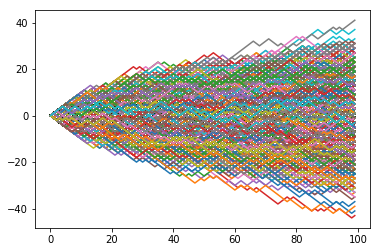

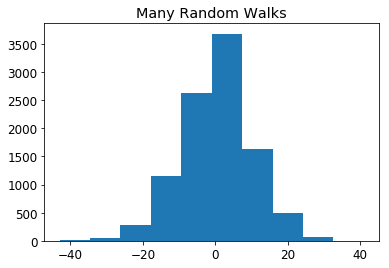

In [6]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,sin,cos,zeros
from numpy.random import rand,randint

a = []

for i in range(10000): #walks
    steps = 100 #steps
    step = zeros(steps) #rows 2 columns
    for j in range(1,steps): 
        x = 2*randint(2) - 1 #delta x
        step[j] = step[j-1] + (x) #where the step will go 
    a.append(step[-1])
    plt.plot(step)
    

plt.figure()
plt.rc('font',size=12)
plt.hist(a)
plt.title('Many Random Walks')
plt.show()

Equipotentials. I am keeping the description for these graphs in this cell because most of the code for each is pretty similar considering that each is some sort of heat graph for an equipotential. These graphs are important/ were important for my physics curriculum because they show a great way to utilize the laplace equation in a physical setting. The Laplace equation is used in this case to solve and plot V(x,y) inside a square with specific boundaries. The first cell shows an equipotential environment with a charge present, while the second and third cell show no charge and different boundaries. The last cell shows an equipotential environment between two parallel plate capacitors.

Sweeps = 106    Biggest dV = 0.009379376778711545 V


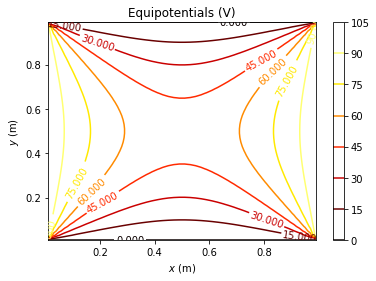

In [2]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt

#Laplace Equation 

ll = 1.0     # size of square L (m)
pts = 50      # grid pts on each edge
dvmax = 0.01 # stop when V changes less than this (V)
om = 0.9     # over relaxation parameter

a = ll/(pts-1)           # grid spacing (m)
vv = np.zeros((pts,pts))  #  will hold V(x,y) (V)

# Set V on boundaries:
for j in range(pts):
    vv[0,j] = 100.0      # left edge x=0 
    vv[-1,j] = 100.0     # right edge x=L
for k in range(pts):
    vv[k,0] = 0.0   # bottom edge y=0
    vv[k,-1] = 0.0     # top edge y=L

# Relaxation calculation:
dvvbig = 2*dvmax  # will hold biggest Delta-V, set large so calc will start
sweeps = 0
while dvvbig > dvmax:
    sweeps += 1
    dvvbig = 0.0    
    for j in range(1,pts-1):
        for k in range(1,pts-1):
            avn = 0.25*(vv[j+1,k]+vv[j-1,k]+vv[j,k+1]+vv[j,k-1])
            dvv = (1+om)*(avn - vv[j,k])
            vv[j,k] += dvv
            if abs(dvv)>dvvbig:
                dvvbig = abs(dvv)

print('Sweeps =',sweeps,'   Biggest dV =',dvvbig,'V')

# Use imshow to plot transpose of vv, so y is vertical in plot:
cs = plt.contour(vv.T,origin='lower',extent=(0,ll,0,ll))
plt.clabel(cs,inline=1,fontsize=10)
plt.colorbar()
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title('Equipotentials (V)')
plt.hot()
plt.show()


Sweeps = 109    Biggest dV = 0.007698623498112056 V


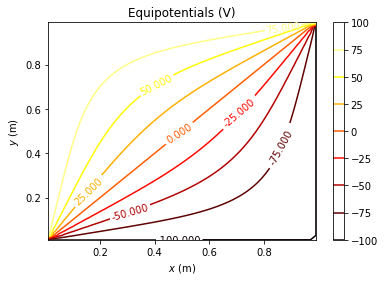

In [3]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt

#Laplace Equation 

ll = 1.0     # size of square L (m)
pts = 50      # grid pts on each edge
dvmax = 0.01 # stop when V changes less than this (V)
om = 0.9     # over relaxation parameter

a = ll/(pts-1)           # grid spacing (m)
vv = np.zeros((pts,pts))  #  will hold V(x,y) (V)

# Set V on boundaries:
for j in range(pts):
    vv[0,j] = 100.0      # left edge x=0 
    vv[-1,j] = -100.0     # right edge x=L
for k in range(pts):
    vv[k,0] = -100.0   # bottom edge y=0
    vv[k,-1] = 100.0     # top edge y=L

# Relaxation calculation:
dvvbig = 2*dvmax  # will hold biggest Delta-V, set large so calc will start
sweeps = 0
while dvvbig > dvmax:
    sweeps += 1
    dvvbig = 0.0    
    for j in range(1,pts-1):
        for k in range(1,pts-1):
            avn = 0.25*(vv[j+1,k]+vv[j-1,k]+vv[j,k+1]+vv[j,k-1])
            dvv = (1+om)*(avn - vv[j,k])
            vv[j,k] += dvv
            if abs(dvv)>dvvbig:
                dvvbig = abs(dvv)

print('Sweeps =',sweeps,'   Biggest dV =',dvvbig,'V')

# Use imshow to plot transpose of vv, so y is vertical in plot:
cs = plt.contour(vv.T,origin='lower',extent=(0,ll,0,ll))
plt.clabel(cs,inline=1,fontsize=10)
plt.colorbar()
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title('Equipotentials (V)')
plt.hot()
plt.show()


Sweeps = 102    Biggest dV = 0.008509904621657448 V


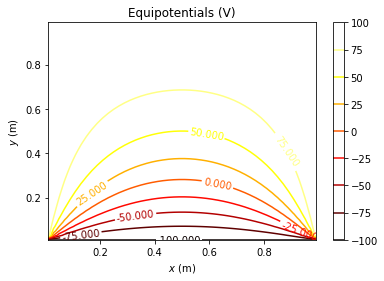

In [4]:
#Written by Zachary Bilodeau
ll = 1.0     # size of square L (m)
pts = 50      # grid pts on each edge
dvmax = 0.01 # stop when V changes less than this (V)
om = 0.9     # over relaxation parameter

a = ll/(pts-1)           # grid spacing (m)
vv = np.zeros((pts,pts))  #  will hold V(x,y) (V)
p = np.zeros((pts,pts))
p0 = (1e6)
e0 = -1

# Set V on boundaries:
for j in range(pts):
    vv[0,j] = 100.0      # left edge x=0 
    vv[-1,j] = 100.0     # right edge x=L
for k in range(pts):
    vv[k,0] = -100.0     # bottom edge y=0
    vv[k,-1] = 100.0     # top edge y=L

x = np.linspace(0,ll,pts)
for j in range(1,pts-1):
    for k in range(1,pts-1):
         if x[k] < ll/3 and x[j] < 2*ll/3 and x[k] < 2*ll/3 and x[j] < ll/3 :
            p[j,k] = p0

# Relaxation calculation:
dvvbig = 2*dvmax  # will hold biggest Delta-V, set large so calc will start
sweeps = 0
while dvvbig > dvmax:
    sweeps += 1
    dvvbig = 0.0    
    for j in range(1,pts-1):
        for k in range(1,pts-1):
            avn = 0.25*(vv[j+1,k]+vv[j-1,k]+vv[j,k+1]+vv[j,k-1])
            dvv = (1+om)*(avn - vv[j,k])
            vv[j,k] += dvv
            if abs(dvv)>dvvbig:
                dvvbig = abs(dvv)

print('Sweeps =',sweeps,'   Biggest dV =',dvvbig,'V')

# Use imshow to plot transpose of vv, so y is vertical in plot:
cs = plt.contour(vv.T,origin='lower',extent=(0,ll,0,ll))
plt.clabel(cs,inline=1,fontsize=10)
plt.colorbar()
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title('Equipotentials (V)')
plt.hot()
plt.show()

Potential at each grid point:  9.999999999999999e-05


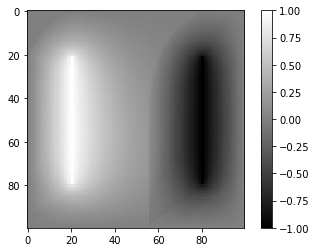

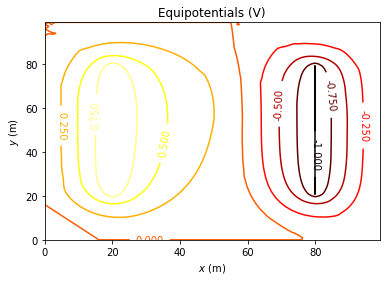

In [5]:
#Written by Zachary Bilodeau
V = 1.0  # volts
N = 100  # number of grid points
om = 0.9     # over relaxation parameter
dvmax = 0.1
a = 0.1  # grid spacing in centimeters
vv = np.zeros((N,N))  #  will hold V(x,y) (V)
p = np.zeros((N,N))
p0 = (1*10**-6)  #volts
e0 = -1

x = np.linspace(0,a,N)
for j in range(1,N-1):
    for k in range(1,N-1):
         if x[k] < a/3 and x[j] < 2*a/3 and x[k] < 2*a/3 and x[j] < a/3 :
            p[j,k] = p0

z = N*p0
print('Potential at each grid point: ',z)
            
# Relaxation calculation:
dvvbig = 2*dvmax  # will hold biggest Delta-V, set large so calc will start
sweeps = 0
jleft = round(N*0.2)
jright = round(N*0.8)
ktop = round(N*0.2)
kbottom = round(N*0.8)
while dvvbig > dvmax:
    sweeps += 1
    dvvbig = 0.0    
    for j in range(1,N-1):
        for k in range(1,N-1):
            if j==jleft and k>ktop and k<kbottom:
                vv[j,k]=1
            elif j==jright and k>ktop and k<kbottom:
                vv[j,k]=-1
            else:
                avn = 0.25*(vv[j+1,k]+vv[j-1,k]+vv[j,k+1]+vv[j,k-1])
                dvv = (1+om)*(avn - vv[j,k])
                vv[j,k] += dvv
                if abs(dvv)>dvvbig:
                    dvvbig = abs(dvv)
          
plt.imshow(vv.T)
plt.gray()
plt.colorbar()
plt.show()

cs = plt.contour(vv.T)
plt.clabel(cs,inline=1,fontsize=10)
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title('Equipotentials (V)')
plt.hot()
plt.show()

This is the Lab Code for my project on microtubules in my Senior Lab. All the lists below are the total length traveled of the microtubules and the plot describes the behavior of their motion. The lines were all curve fitted to see which type of fit, in this case linear, works the best. This project was pretty special to me because it was the first time as a physics student me and my groupmate had to come up with our own procedure and own experiment to take data on and write code to analyze actual data WE recorded in a lab we designed. This was something that really made me value my education and my learning enviroment. 


Parameters and 2-sigma parameter uncertainties:
p0 = 0.230551 +/- 0.118914
p1 = 5.980928 +/- 0.068090
Reduced chi-squared = 0.028744

Parameters and 2-sigma parameter uncertainties:
p0 = 0.218764 +/- 0.150248
p1 = 6.068432 +/- 0.086032
Reduced chi-squared = 0.045889

Parameters and 2-sigma parameter uncertainties:
p0 = 0.186887 +/- 0.152210
p1 = 6.122147 +/- 0.087155
Reduced chi-squared = 0.047095

Parameters and 2-sigma parameter uncertainties:
p0 = -0.192014 +/- 0.209927
p1 = 5.472012 +/- 0.120204
Reduced chi-squared = 0.089584

Parameters and 2-sigma parameter uncertainties:
p0 = -1.271061 +/- 0.462974
p1 = 4.930304 +/- 0.265098
Reduced chi-squared = 0.435718

Parameters and 2-sigma parameter uncertainties:
p0 = -0.113895 +/- 0.146750
p1 = 6.657930 +/- 0.084029
Reduced chi-squared = 0.043777

Parameters and 2-sigma parameter uncertainties:
p0 = 0.279809 +/- 0.108253
p1 = 5.968333 +/- 0.061986
Reduced chi-squared = 0.023822

Parameters and 2-sigma parameter uncertainties:
p0 = 0.179

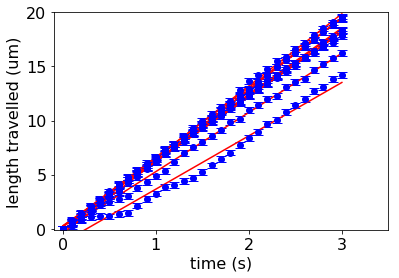

In [7]:
#Written by Zachary Bilodeau
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy import sqrt
from scipy.optimize import curve_fit

t = np.linspace(0,3,31)

a1 = [0,0.53,1.435444182,2.028718808,2.533002171,3.119262733,3.710417766,4.21848314,5.062815422,5.648521931,6.408884458,6.995369897,7.592634589,8.17812937,8.767622255,9.367182074,9.954385968,10.45277475,11.05204054,11.64237948,12.22965658,12.83010522,13.42151258,14.10954287,14.71163145,15.30077776,15.89387303,16.2478614,16.83747309,17.19292005,17.78684064]

a2 = [0,0.6037383539,1.198540779,1.946406946,2.529822128,3.128657859,3.631225688,4.475321218,5.059644256,5.657958996,6.502245766,7.343269027,7.858403146,8.352245207,8.870828597,9.71413918,10.22476406,10.73726688,11.3281596,11.84079811,12.35490186,12.88003106,13.39658539,13.97139936,14.49757221,15.0748068,15.91566838,16.4312994,17.26962652,17.79538142,18.37307269]

a3 = [0,0.7566372975,1.13137085,1.887988347,2.453487314,3.019354236,3.582680561,4.540396458,5.12249939,5.70629477,6.248199741,7.209133096,7.785685583,8.328000961,8.964128513,9.545307748,10.13333607,10.94455116,11.53776408,12.12871799,12.72003145,13.17587189,13.7634625,14.21786201,14.82028677,15.28037303,15.87473464,16.47300823,17.19989826,17.66191383,18.26033954]

a4 = [0,0.8443340571,1.366930869,2.14,2.156965461,2.46,2.724059471,2.98918049,3.778782873,4.304009758,4.830279495,5.367233924,6.191897932,6.985957343,7.512715887,8.039900497,8.57738888,9.086060753,9.884760999,10.14359404,10.9433313,11.47,12,12.27,13.07,13.6,13.87,14.67230384,15.20222352,15.74214725,16.27207731]

a5 = [0,0.27,0.8411896338,1.07,1.194068675,1.13137085,1.328006024,1.431712262,2.14580987,2.743884108,3.251538098,3.84407336,4.063065345,4.435414299,4.664761516,5.258307713,5.847093295,6.449806199,7.043990346,7.768886664,8.37095574,8.959564722,9.691878043,10.05831994,10.79539254,11.39021071,11.98235786,12.71457825,13.08834978,13.82333173,14.19834145]

a6 = [0,0.5903388857,1.101135777,1.919270695,2.379180531,2.982918034,4.063065345,4.664761516,5.170348151,5.922913135,6.6640003,7.250689622,7.785685583,8.530211017,9.121403401,9.655490666,10.24499878,10.99025932,11.54300221,12.86905202,13.62350909,14.16631568,14.75127113,15.49870317,15.87954659,16.62726075,17.18723073,17.93568789,18.51087518,19.06559467,19.36826786]

a7 = [0,0.53,1.357129323,1.86,2.66,3.2,4,4.538039224,5.336834268,5.86,6.405692781,6.935257746,7.46488446,8.004554953,8.804141071,9.345041466,9.874234148,10.41349605,11.21253317,11.74196747,12.27145061,12.81096796,13.34053222,14.13993635,14.66957736,15.20923732,15.73892627,16.26863547,16.81903683,17.40370363,17.98574301]

a8 = [0,0.6511528238,1.369525465,2.106181379,2.740456166,3.440930107,4.12825629,4.774704179,5.471105921,6.064363116,6.652796405,7.241995581,7.841842896,8.600430222,9.300413969,9.928595067,10.5866378,11.25168876,11.78257188,12.31780013,12.94728157,13.60476387,14.26234553,14.95544382,15.61323157,16.24305698,16.90085205,17.46830845,18.19715637,18.88420504,19.45559303]

a9 = [0,0.4346262762,0.8908984229,1.446824108,2.156153983,2.794852411,3.394186206,4.241344127,4.800166664,5.56,6.188279244,6.911128707,7.546343485,8.219026706,8.825106232,9.553554312,10.12166488,10.91648753,11.4579623,12.22347332,12.80905929,13.56631122,14.15357552,14.93827634,15.59674646,16.21871758,16.80654932,17.49187812,18.15713909,18.80443565,19.61515995]

data3 = [a1,a2,a3,a4,a5,a6,a7,a8,a9]

slope = [5.9809,6.0684,6.1221,5.472,4.9303,6.6579,5.9683,6.4345,6.635]


nn = len(a1)        # number of data points

sigma2 = np.full((len(a1)),1)

def f(x,p0,p1):
    """Model function: straight line"""
    return p0 + p1*x


yerr = []
for i in range(31):
    i =0.27
    yerr.append(i)


for i in data3:
    # Use curve_fit to fit the data:
    guesses = [0,6]   # parameter guesses
    print()
    (p0,p1),cc = curve_fit(f,t,i,guesses,sigma = yerr)
   
# Plot data and model together:
    xmod = np.linspace(t[0],t[-1],len(a1))  # assumes x's are in order
    ymod = f(xmod,p0,p1)
    #plt.figure(figsize=(8,5))
    plt.rc('font', size=16)
    plt.errorbar(t,i,yerr,fmt='bo',capsize=5) # plot the data
    plt.plot(xmod,ymod,'r') 
    plt.xlim([-.1,3.5])
    plt.ylim([-.1,20])                  # plot the model
    plt.xlabel('time (s)')
    plt.ylabel('length travelled (um)')
    #plt.show()

# Print parameters and their 2-sigma uncertainties:
    up0,up1 = 2*sqrt(np.diag(cc)) # diagonal of cc gives param variances
    print('Parameters and 2-sigma parameter uncertainties:')
    print('p0 = %f +/- %f'%(p0,up0))
    print('p1 = %f +/- %f'%(p1,up1))

# Compute reduced chi-squared:
    yfit = f(t,p0,p1)
    yys = (yfit-i)**2/sigma2**2
    dof = len(t) - len(guesses)    # degrees of freedom
    chisqr = sum(yys)/dof
    print('Reduced chi-squared = %f'%chisqr)
plt.show()